<a href="https://colab.research.google.com/github/DanZter/QARIK_knowledge_graph_project/blob/master/test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install spacy

In [ ]:
!python3 -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

In [ ]:
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

India, officially the Republic of India (Hindi: Bhārat Gaṇarājya),[23] is a country in South Asia. It is the second-most populous country, the seventh-largest country by area, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west;[f] China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share a maritime border with Thailand and Indonesia. Modern humans arrived on the Indian subcontinent from Africa no later than 55,000 years ago.[24] Their long occupation, initially in varying forms of isolation as hunter-gatherers, has made the region highly diverse, second only to Africa in human genetic diversity.[25] Settled life emerged on the subcontinent in the western margins of the Indus river basin 9,000 ye

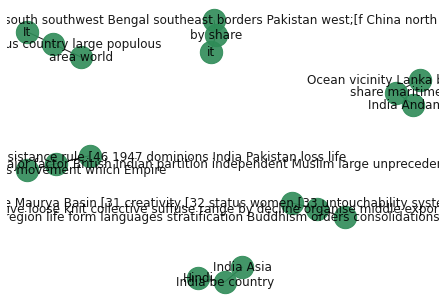

In [ ]:
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

if __name__ == "__main__":

    # text = "Language model pre-training has been shown to be effective for improving many natural language processing tasks (Dai and Le, 2015; Peters et al., 2018a; Radford et al., 2018; Howard and Ruder, 2018). These include sentence-level tasks such as natural language inference (Bowman et al., 2015; Williams et al., 2018) and paraphrasing (Dolan and Brockett, 2005), which aim to predict the relationships between sentences by analyzing them holistically, as well as token-level tasks such as named entity recognition and question answering, where models are required to produce fine-grained output at the token level (Tjong Kim Sang and De Meulder, 2003; Rajpurkar et al., 2016). There are two existing strategies for applying pre-trained language representations to downstream tasks: feature-based and fine-tuning. The feature-based approach, such as ELMo (Peters et al., 2018a), uses task-specific architectures that include the pre-trained representations as additional features. The fine-tuning approach, such as the Generative Pre-trained Transformer (OpenAI GPT) (Radford et al., 2018), introduces minimal task-specific parameters, and is trained on the downstream tasks by simply fine-tuning all pretrained parameters. The two approaches share the same objective function during pre-training, where they use unidirectional language models to learn general language representations. We argue that current techniques restrict the power of the pre-trained representations, especially for the fine-tuning approaches. The major limitation is that standard language models are unidirectional, and this limits the choice of architectures that can be used during pre-training. For example, in OpenAI GPT, the authors use a left-toright architecture, where every token can only attend to previous tokens in the self-attention layers of the Transformer (Vaswani et al., 2017). Such restrictions are sub-optimal for sentence-level tasks, and could be very harmful when applying finetuning based approaches to token-level tasks such as question answering, where it is crucial to incorporate context from both directions. In this paper, we improve the fine-tuning based approaches by proposing BERT: Bidirectional Encoder Representations from Transformers. BERT alleviates the previously mentioned unidirectionality constraint by using a “masked language model” (MLM) pre-training objective, inspired by the Cloze task (Taylor, 1953)."
    text = "India, officially the Republic of India (Hindi: Bhārat Gaṇarājya),[23] is a country in South Asia. It is the second-most populous country, the seventh-largest country by area, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west;[f] China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share a maritime border with Thailand and Indonesia. Modern humans arrived on the Indian subcontinent from Africa no later than 55,000 years ago.[24] Their long occupation, initially in varying forms of isolation as hunter-gatherers, has made the region highly diverse, second only to Africa in human genetic diversity.[25] Settled life emerged on the subcontinent in the western margins of the Indus river basin 9,000 years ago, evolving gradually into the Indus Valley Civilisation of the third millennium BCE.[26] By 1200 BCE, an archaic form of Sanskrit, an Indo-European language, had diffused into India from the northwest, unfolding as the language of the Rigveda, and recording the dawning of Hinduism in India.[27] The Dravidian languages of India were supplanted in the northern regions.[28] By 400 BCE, stratification and exclusion by caste had emerged within Hinduism,[29] and Buddhism and Jainism had arisen, proclaiming social orders unlinked to heredity.[30] Early political consolidations gave rise to the loose-knit Maurya and Gupta Empires based in the Ganges Basin.[31] Their collective era was suffused with wide-ranging creativity,[32] but also marked by the declining status of women,[33] and the incorporation of untouchability into an organised system of belief.[g][34] In South India, the Middle kingdoms exported Dravidian-languages scripts and religious cultures to the kingdoms of Southeast Asia.[35] In the early medieval era, Christianity, Islam, Judaism, and Zoroastrianism put down roots on India's southern and western coasts.[36] Muslim armies from Central Asia intermittently overran India's northern plains,[37] eventually establishing the Delhi Sultanate, and drawing northern India into the cosmopolitan networks of medieval Islam.[38] In the 15th century, the Vijayanagara Empire created a long-lasting composite Hindu culture in south India.[39] In the Punjab, Sikhism emerged, rejecting institutionalised religion.[40] The Mughal Empire, in 1526, ushered in two centuries of relative peace,[41] leaving a legacy of luminous architecture.[h][42] Gradually expanding rule of the British East India Company followed, turning India into a colonial economy, but also consolidating its sovereignty.[43] British Crown rule began in 1858. The rights promised to Indians were granted slowly,[44] but technological changes were introduced, and ideas of education, modernity and the public life took root.[45] A pioneering and influential nationalist movement emerged, which was noted for nonviolent resistance and became the major factor in ending British rule.[46] In 1947 the British Indian Empire was partitioned into two independent dominions, a Hindu-majority Dominion of India and a Muslim-majority Dominion of Pakistan, amid large-scale loss of life and an unprecedented migration.[47][48]"
    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    print (text)
    for sentence in sentences:
        triples.append(processSentence(sentence))

    printGraph(triples)


In [ ]:
# import matplotlib
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=100)